Install Necessary Libraries

In [124]:
# Install Faker package

!pip install faker
from faker import Faker

# Install Pandas package

!pip install pandas
import pandas as pd

Synthetic Dataset Creation

In [125]:
import pandas as pd
from faker import Faker
import random
from datetime import datetime, timedelta

# Initialize Faker and create an empty DataFrame
fake = Faker()
num_records = 5000
max_interactions_per_customer = 5  # Set a maximum number of interactions per customer

# Create lists to store the data
data = []
customer_data = {}
product_data = {}  # To store product metadata
product_name_to_id = {}  # Mapping from product name to product id

# List of possible product names
product_names = ['Car Loan', 'Bike Insurance', 'Car Insurance', 'Personal Loan', 'Savings Account', 'Credit Card',
                 'Fixed Deposit', 'Recurring Deposit', 'Debit Card', 'Home Loan', 'Life Insurance', 'Health Insurance']

# Create a consistent mapping for product_id based on product_name
for idx, product in enumerate(product_names, start=1):
    product_name_to_id[product] = f"P{str(idx).zfill(5)}"  # Ensure the product_id is consistent (e.g., C00001, C00002, etc.)

# Get the date three years ago from today
three_years_ago = datetime.now() - timedelta(days=365*3)

# Generate data for each customer
for _ in range(num_records):
    customer_id = f"C{random.randint(100, 999)}{random.randint(100, 999)}"  # Unique customer_id
    if customer_id not in customer_data:
        # Generate random customer details and ensure they remain consistent for the customer
        customer_data[customer_id] = {
            'customer_age': random.randint(18, 70),  # Random age
            'customer_income': random.randint(20000, 1000000),  # Random income
            'customer_tier': random.choice(['Bronze', 'Silver', 'Gold', 'Platinum'])  # Random tier
        }

    # Generate multiple interactions for each customer
    num_interactions = random.randint(1, max_interactions_per_customer)  # Random number of interactions for each customer

    for _ in range(num_interactions):
        # Choose a product randomly, using the predefined consistent mapping
        product_name = random.choice(product_names)
        interaction_type = random.choice(['clicked', 'viewed', 'purchased'])  # Interaction type
        # Generate a random date within the last three years
        interaction_date = fake.date_between_dates(three_years_ago, datetime.now())

        # Use the pre-defined mapping to get the consistent product_id
        product_id = product_name_to_id[product_name]

        # Add the data for this customer interaction
        data.append({
            'customer_id': customer_id,
            'product_id': product_id,  # Consistent Product ID
            'interaction_type': interaction_type,  # Interaction type (no encoding yet)
            'interaction_date': interaction_date,
            'products': product_name,
            'customer_age': customer_data[customer_id]['customer_age'],
            'customer_income': customer_data[customer_id]['customer_income'],
            'customer_tier': customer_data[customer_id]['customer_tier'],
        })

# Convert to DataFrame
df = pd.DataFrame(data)

# Save the data to a CSV file
df.to_csv('Customer_Purchase_Details.csv', index=False)


Read the dataset

In [126]:
# Read the dataset

df = pd.read_csv(r"/content/Customer_Purchase_Details.csv")
df

,customer_id,product_id,interaction_type,interaction_date,products,customer_age,customer_income,customer_tier
0,C707799,P00012,purchased,2022-05-08,Health Insurance,31,874991,Silver
1,C707799,P00003,purchased,2023-09-04,Car Insurance,31,874991,Silver
2,C707799,P00004,clicked,2022-05-09,Personal Loan,31,874991,Silver
3,C707799,P00002,viewed,2023-06-13,Bike Insurance,31,874991,Silver
4,C707799,P00003,viewed,2024-04-21,Car Insurance,31,874991,Silver
...,...,...,...,...,...,...,...,...
15072,C940473,P00008,purchased,2022-09-13,Recurring Deposit,61,244142,Platinum
15073,C940473,P00008,clicked,2023-06-03,Recurring Deposit,61,244142,Platinum
15074,C352502,P00009,viewed,2024-02-13,Debit Card,38,945123,Silver
15075,C352502,P00007,viewed,2024-04-30,Fixed Deposit,38,945123,Silver


Data Cleaning process

In [127]:
df.columns.values

array(['customer_id', 'product_id', 'interaction_type',
       'interaction_date', 'products', 'customer_age', 'customer_income',
       'customer_tier'], dtype=object)

In [128]:
# looking for NaN values

df.isnull().values.any()

False

In [129]:
df.isnull().sum()

,0
customer_id,0
product_id,0
interaction_type,0
interaction_date,0
products,0
customer_age,0
customer_income,0
customer_tier,0


In [130]:
# Looking for duplicates

df[df.duplicated()]

,customer_id,product_id,interaction_type,interaction_date,products,customer_age,customer_income,customer_tier
3160,C820799,P00005,purchased,2022-02-06,Savings Account,24,353020,Bronze
3506,C649313,P00007,viewed,2022-07-28,Fixed Deposit,55,155528,Silver
12300,C646310,P00004,purchased,2024-05-21,Personal Loan,35,967359,Platinum


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15077 entries, 0 to 15076
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       15077 non-null  object
 1   product_id        15077 non-null  object
 2   interaction_type  15077 non-null  object
 3   interaction_date  15077 non-null  object
 4   products          15077 non-null  object
 5   customer_age      15077 non-null  int64 
 6   customer_income   15077 non-null  int64 
 7   customer_tier     15077 non-null  object
dtypes: int64(2), object(6)
memory usage: 942.4+ KB


Installing Required Packages

In [132]:
# Missingno package installation

!pip install missingno
import missingno as msno

# Install Matplotlib package

!pip install matplotlib
import matplotlib.pyplot as plt

# Install Seaborn package

!pip install seaborn
import seaborn as sns

# Install Numpy package

!pip install numpy
import numpy as np

EDA

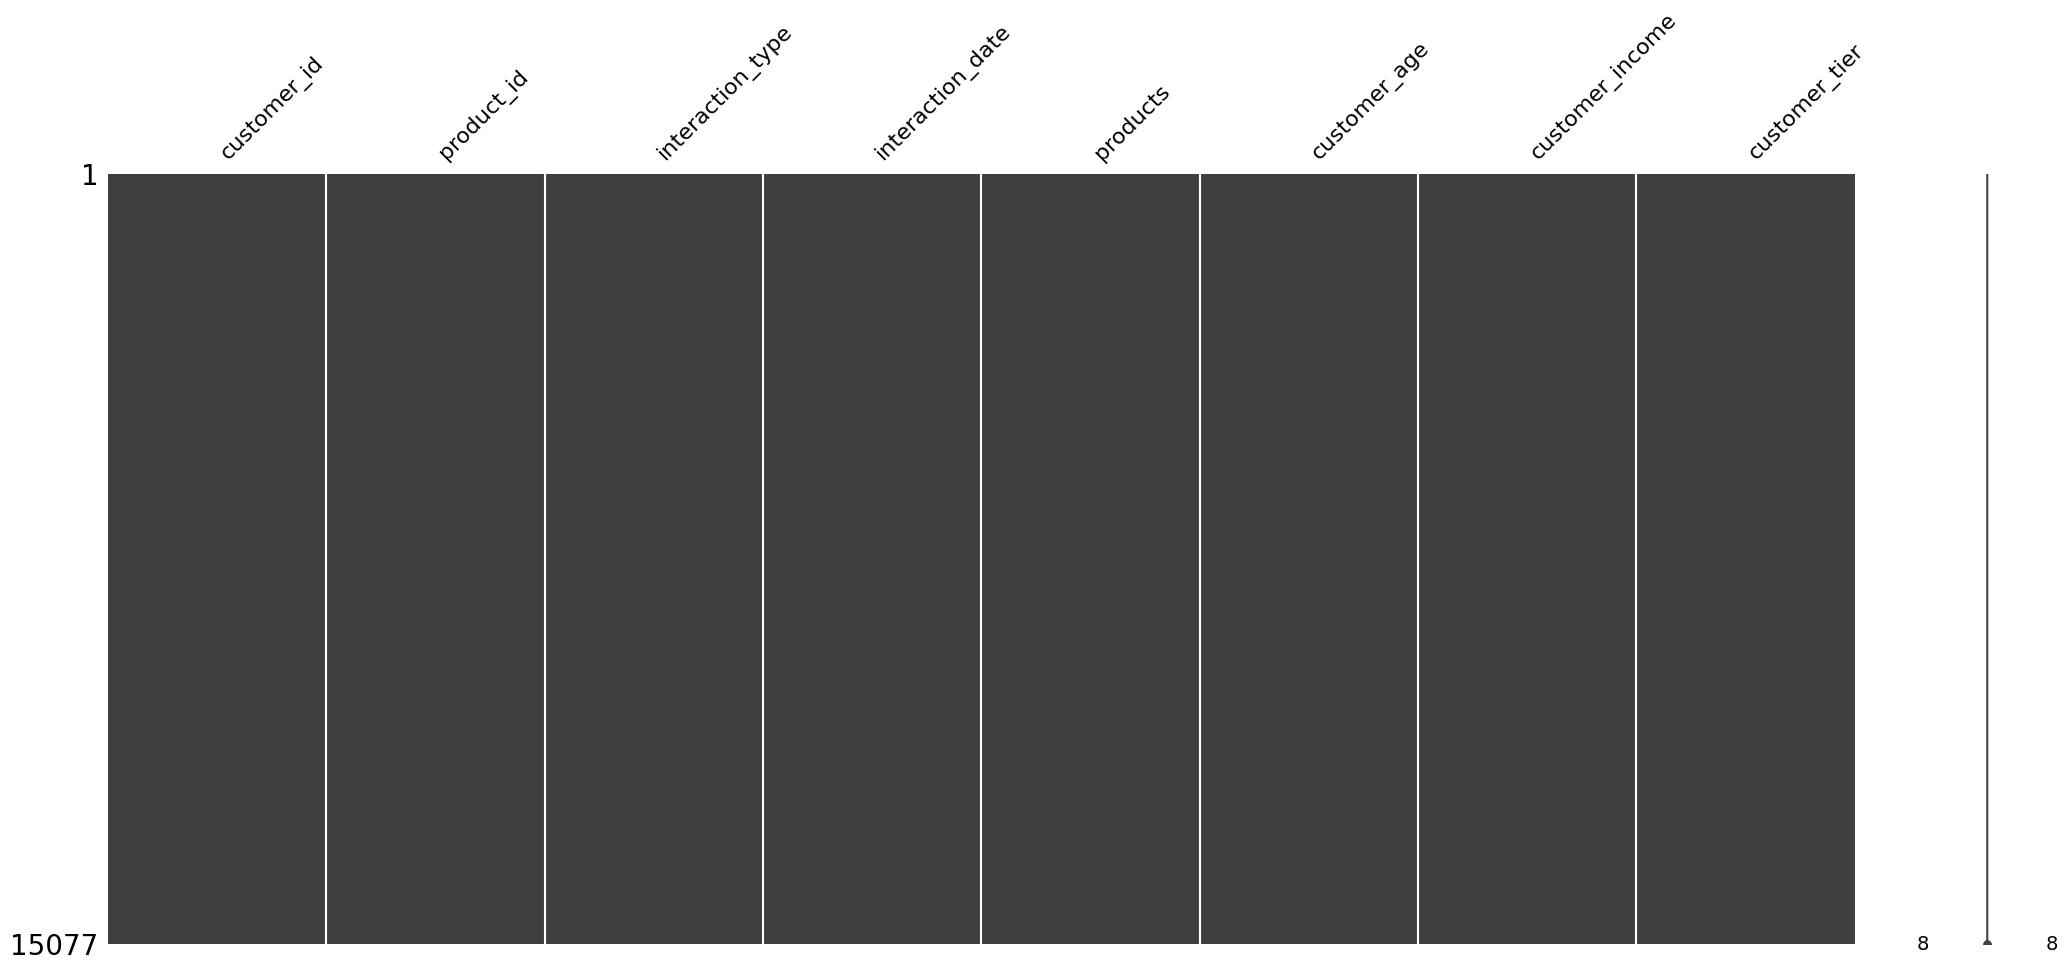

In [133]:
msno.matrix(df)
plt.show()

In [134]:
df['interaction_date'] = pd.to_datetime(df['interaction_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15077 entries, 0 to 15076
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       15077 non-null  object        
 1   product_id        15077 non-null  object        
 2   interaction_type  15077 non-null  object        
 3   interaction_date  15077 non-null  datetime64[ns]
 4   products          15077 non-null  object        
 5   customer_age      15077 non-null  int64         
 6   customer_income   15077 non-null  int64         
 7   customer_tier     15077 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 942.4+ KB


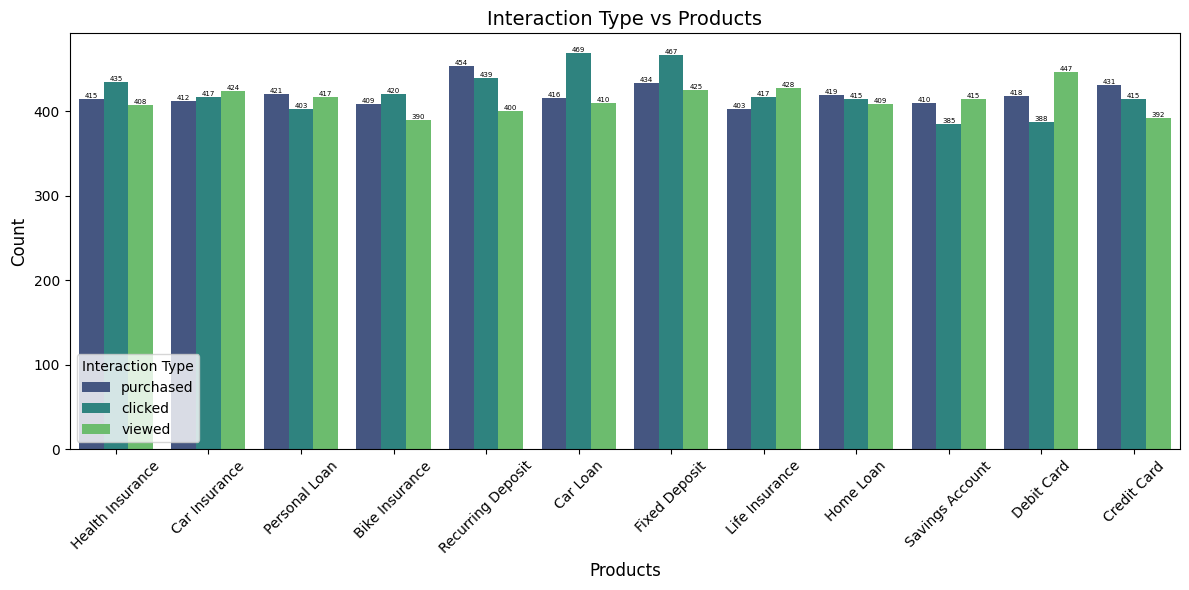

In [135]:
# Create the grouped bar chart
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='products', hue='interaction_type', palette='viridis')

# Annotate counts on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=5, color='black')

# Customize the chart
plt.title("Interaction Type vs Products", fontsize=14)
plt.xlabel("Products", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Interaction Type", fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


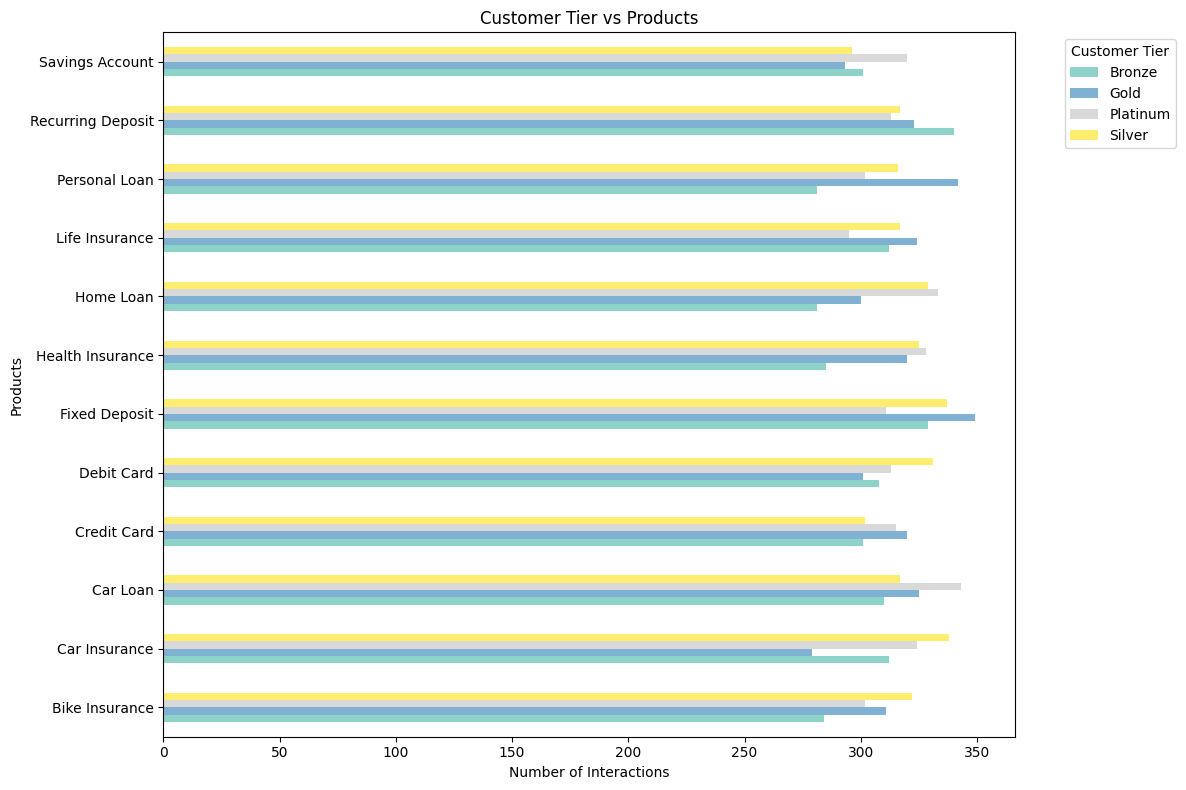

In [136]:
# Group data (Bar Chart)
grouped_data = df.groupby(['products', 'customer_tier']).size().unstack()

# Plot horizontal grouped bar chart
grouped_data.plot(kind='barh', figsize=(12, 8), colormap='Set3')
plt.title('Customer Tier vs Products')
plt.xlabel('Number of Interactions')
plt.ylabel('Products')
plt.legend(title='Customer Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

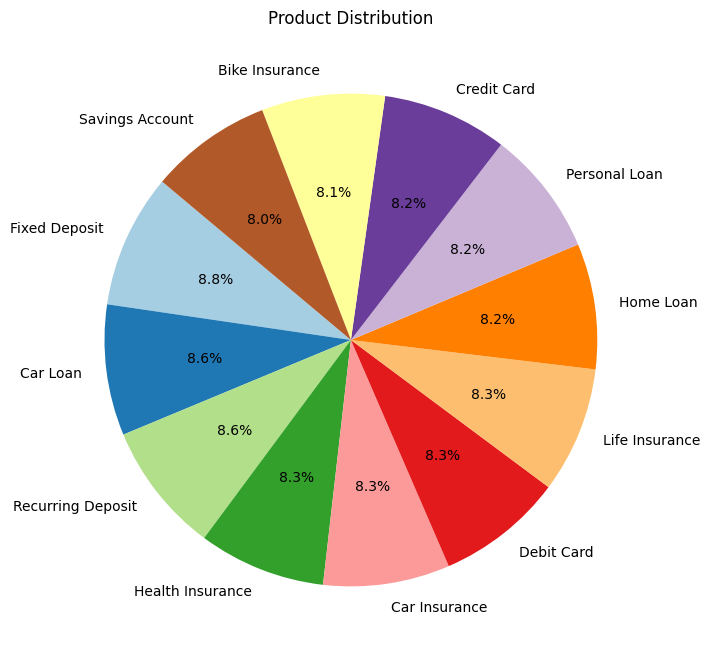

In [137]:
# Group by Transaction_Type and count or sum transaction amounts (Pie Chart)
product_counts = df['products'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
product_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Product Distribution")
plt.ylabel("")  # Hides the default ylabel
plt.show()

In [138]:
# Extract the year
df['Year'] = df['interaction_date'].dt.year

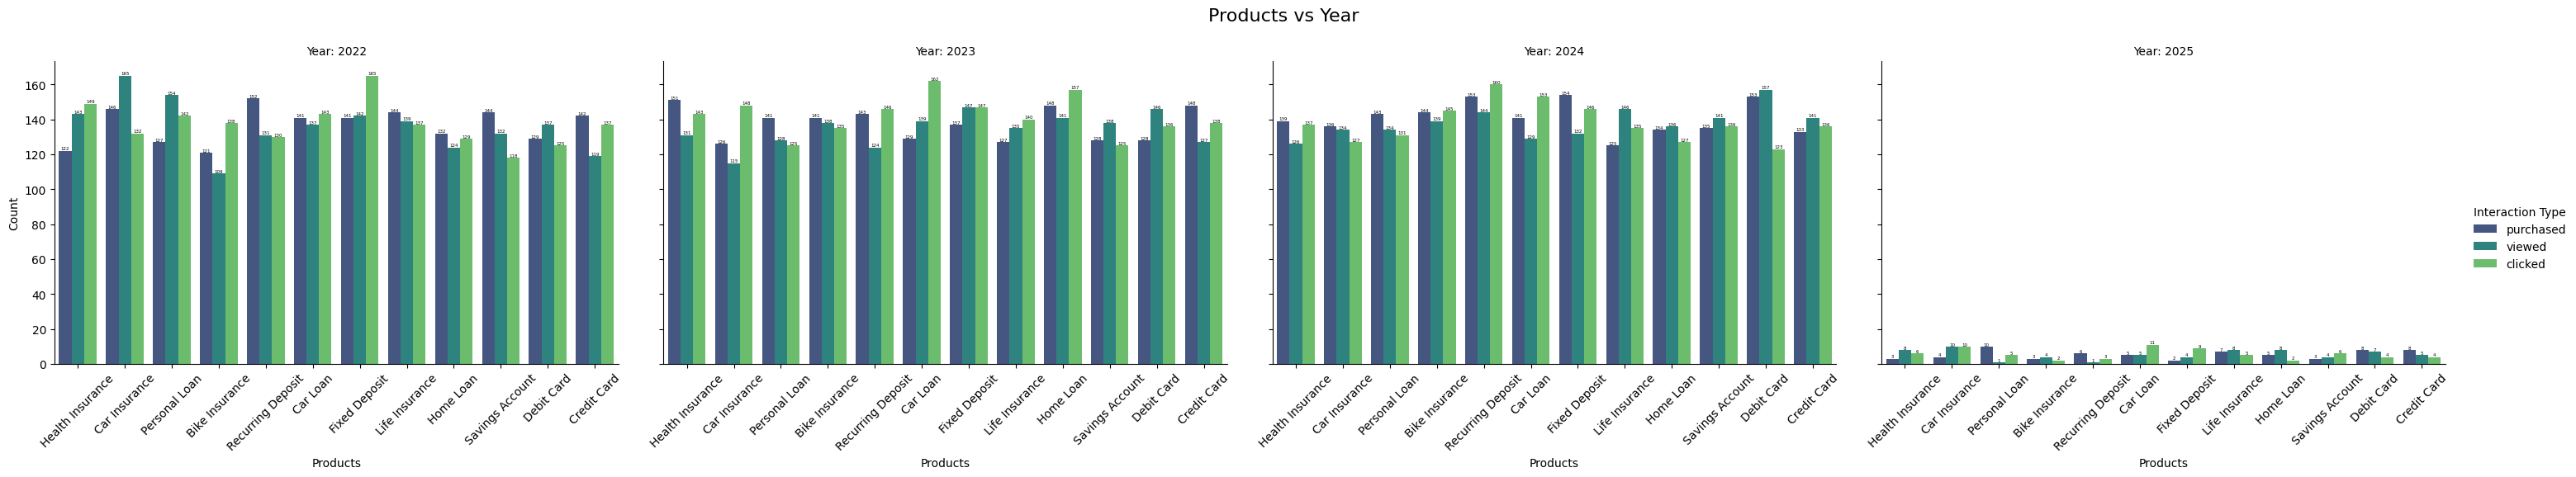

In [139]:
# Create a FacetGrid for year comparison (Bar Chart)
g = sns.catplot(
    data=df,
    x="products",
    hue="interaction_type",
    col="Year",  # Separate plots for each year
    kind="count",
    palette='viridis',
    height=5,
    aspect=1.5,
    hue_order=["purchased", "viewed", "clicked"]
)

# Annotate counts on the bars in each subplot
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=4, color='black')

# Customize plot
g.set_titles("Year: {col_name}")
g.set_axis_labels("Products", "Count")
g.set_xticklabels(rotation=45)
g._legend.set_title("Interaction Type")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Products vs Year", fontsize=16)

# Show the plot
plt.show()


Label Encoding

In [140]:
# Label encoding for Interaction Type
df['interaction_type'] = df['interaction_type'].map({'clicked': 1, 'viewed': 2, 'purchased': 3})


In [141]:
df.columns.values

array(['customer_id', 'product_id', 'interaction_type',
       'interaction_date', 'products', 'customer_age', 'customer_income',
       'customer_tier', 'Year'], dtype=object)

Algorithm Selection & Prediction (Collaborative Filtering)

In [142]:
import random
from sklearn.metrics.pairwise import cosine_similarity

# Create the user-item matrix (rows are customers, columns are products)
interaction_matrix = df.pivot_table(index='customer_id', columns='product_id', values='interaction_type', aggfunc='max', fill_value=0)

# Compute the cosine similarity between customers
customer_similarity = cosine_similarity(interaction_matrix)

# Convert the similarity matrix to a DataFrame for easier interpretation
similarity_df = pd.DataFrame(customer_similarity, index=interaction_matrix.index, columns=interaction_matrix.index)

# Create a mapping from product_id to product_category
product_category_mapping = df[['product_id', 'products']].drop_duplicates().set_index('product_id')['products'].to_dict()

# Select 10 random customers from the customer IDs in the interaction matrix
random_customers = random.sample(list(interaction_matrix.index), 10)

# Function to recommend products for a given customer
def recommend_products_for_customer(customer_id):
    # Get the customer's interactions
    customer_interactions = interaction_matrix.loc[customer_id]

    # Get the similarity scores for this customer
    similarity_scores = similarity_df[customer_id]

    # Predict the customer's interest in all products (weighted by similarity)
    predicted_scores = interaction_matrix.T.dot(similarity_scores) / similarity_scores.sum()

    # Sort the products by predicted score to recommend the most likely products
    recommended_products = predicted_scores.sort_values(ascending=False)

    # Get the top N recommended products (e.g., top 5)
    top_recommended_products = recommended_products.head(5)

    return top_recommended_products

# Predict products for each of the 10 random customers
for customer_id in random_customers:
    print(f"Recommended products for Customer {customer_id}:")
    top_recommended_products = recommend_products_for_customer(customer_id)

    # Convert product_id to product name using the mapping
    top_recommended_products_with_category = top_recommended_products.index.to_series().map(product_category_mapping)

    # Create a DataFrame for the recommended products with their predicted scores
    recommended_with_category = pd.DataFrame({
        'product_id': top_recommended_products.index,
        'products': top_recommended_products_with_category,
        'predicted_score': top_recommended_products.values
    })

    print(recommended_with_category)
    print("\n" + "-"*50 + "\n")


Recommended products for Customer C790588:
           product_id           products  predicted_score
product_id                                               
P00003         P00003      Car Insurance         1.065308
P00008         P00008  Recurring Deposit         0.845246
P00011         P00011     Life Insurance         0.807585
P00005         P00005    Savings Account         0.604297
P00007         P00007      Fixed Deposit         0.377322

--------------------------------------------------

Recommended products for Customer C917788:
           product_id           products  predicted_score
product_id                                               
P00006         P00006        Credit Card         2.265420
P00011         P00011     Life Insurance         0.388408
P00002         P00002     Bike Insurance         0.374029
P00008         P00008  Recurring Deposit         0.368940
P00007         P00007      Fixed Deposit         0.366962

------------------------------------------------

Evaluation

In [143]:
from sklearn.metrics import precision_score, recall_score

# Precision and Recall Calculation
def precision_recall_at_k(y_true, y_pred, k=5):
    """
    Calculate Precision and Recall at k for the top k recommended products.

    Args:
        y_true (list): List of ground truth relevant items (product IDs).
        y_pred (list): List of predicted product IDs.
        k (int): Number of top recommendations to consider.

    Returns:
        Precision, Recall at k.
    """
    y_true = set(y_true)  # Convert to set for easy comparison
    y_pred_k = set(y_pred[:k])  # Top k predicted products

    # Precision: How many of the recommended products are relevant
    precision = len(y_true.intersection(y_pred_k)) / k

    # Recall: How many of the relevant products are recommended
    recall = len(y_true.intersection(y_pred_k)) / len(y_true) if len(y_true) > 0 else 0

    return precision, recall

# Mean Average Precision (MAP)
def mean_average_precision(y_true, y_pred):
    """
    Compute Mean Average Precision (MAP) for multiple customers.

    Args:
        y_true (list): Ground truth for each customer.
        y_pred (list): Predicted products for each customer.

    Returns:
        MAP score.
    """
    average_precisions = []

    for true, pred in zip(y_true, y_pred):
        average_precision = 0
        for k in range(1, len(pred) + 1):
            precision, recall = precision_recall_at_k(true, pred, k=k)
            average_precision += precision
        average_precisions.append(average_precision / len(true))

    return np.mean(average_precisions)

# Normalized Discounted Cumulative Gain (NDCG)
def ndcg_at_k(y_true, y_pred, k=5):
    """
    Compute Normalized Discounted Cumulative Gain (NDCG) at k.

    Args:
        y_true (list): Ground truth relevant items (product IDs).
        y_pred (list): Predicted product IDs.
        k (int): Number of top recommendations to consider.

    Returns:
        NDCG score at k.
    """
    dcg = 0
    for i in range(min(k, len(y_pred))):
        if y_pred[i] in y_true:
            dcg += 1 / np.log2(i + 2)

    idcg = 0
    for i in range(min(k, len(y_true))):
        idcg += 1 / np.log2(i + 2)

    return dcg / idcg if idcg > 0 else 0

# Example usage: Calculate Precision, Recall, MAP, NDCG for random customers
y_true = []  # Ground truth (actual interactions)
y_pred = []  # Recommended product IDs

# Collect ground truth and predictions for each random customer
for customer_id in random_customers:
    # Get ground truth for this customer (actual products interacted with)
    true_products = df[df['customer_id'] == customer_id]['product_id'].tolist()
    y_true.append(true_products)

    # Get recommended products for this customer
    top_recommended_products = recommend_products_for_customer(customer_id)
    recommended_product_ids = top_recommended_products.index.tolist()
    y_pred.append(recommended_product_ids)

# Calculate Precision, Recall at k=5, MAP, and NDCG at k=5
precision_list = []
recall_list = []
for i in range(len(y_true)):
    precision, recall = precision_recall_at_k(y_true[i], y_pred[i], k=5)
    precision_list.append(precision)
    recall_list.append(recall)

# Precision and Recall at k=5 (average across users)
avg_precision = np.mean(precision_list)
avg_recall = np.mean(recall_list)

# MAP (Mean Average Precision)
map_score = mean_average_precision(y_true, y_pred)

# NDCG at k=5
ndcg_list = [ndcg_at_k(y_true[i], y_pred[i], k=5) for i in range(len(y_true))]
avg_ndcg = np.mean(ndcg_list)

# Display results
print(f"Average Precision at k=5: {avg_precision}")
print(f"Average Recall at k=5: {avg_recall}")
print(f"Mean Average Precision (MAP): {map_score}")
print(f"Average NDCG at k=5: {avg_ndcg}")


Average Precision at k=5: 0.5200000000000001
Average Recall at k=5: 1.0
Mean Average Precision (MAP): 1.4226666666666667
Average NDCG at k=5: 0.9164876833453522


Save the Model

In [144]:
import joblib

model_to_save = similarity_df

# Save the model to a file using joblib
joblib.dump(model_to_save, 'Product_Recommendation_model.pkl')

print("Model saved successfully!")


Model saved successfully!
